# Assignment 5 Questions

## Problem Statement

#### Task 1:

Read the dataset from the bellow link

url = https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

In [3]:
data1 = data.copy()

In [4]:
data1.tail()

,year,name,percent,sex
257995,2008,Carleigh,0.000128,girl
257996,2008,Iyana,0.000128,girl
257997,2008,Kenley,0.000127,girl
257998,2008,Sloane,0.000127,girl
257999,2008,Elianna,0.000127,girl


Questions

1. Delete unnamed columns

#### There are no unnmaed columns in the provided dataset, the columns present in the dataset are -

2. Show the distribution of male and female

In [5]:
data1.describe()

,year,percent
count,258000.000000,258000.000000
mean,1944.000000,0.000894
std,37.238046,0.003016
min,1880.000000,0.000026
25%,1912.000000,0.000081
50%,1944.000000,0.000164
75%,1976.000000,0.000507
max,2008.000000,0.081541


C:\Users\sdubey1\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:708: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


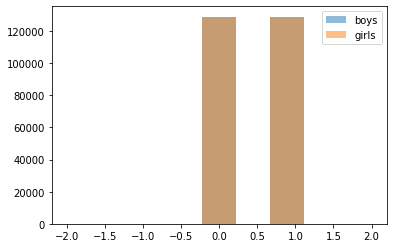

In [6]:
x = [data1['sex'] == 'boy']
y = [data1['sex'] == 'girl']

bins = np.linspace(-2, 2, 10)

plt.hist(x, bins, alpha=0.5, label='boys')
plt.hist(y, bins, alpha=0.5, label='girls')
plt.legend(loc='upper right')
plt.show()

3. Show the top 5 most preferred names

In [7]:
data1.name.value_counts()[:5]

Jessie       258
Leslie       247
Jean         244
Guadalupe    244
Lee          240
Name: name, dtype: int64

4. What is the median name occurence in the dataset

In [8]:
median_value_name = np.median(data1.name.value_counts())

In [9]:
data1.name[median_value_name]

'Joe'

In [10]:
data1.head()

,year,name,percent,sex
0,1880,John,0.081541,boy
1,1880,William,0.080511,boy
2,1880,James,0.050057,boy
3,1880,Charles,0.045167,boy
4,1880,George,0.043292,boy


5. Distribution of male and female born count by year

In [11]:
data1['gender_male'] = np.where(data1.sex == 'boy', 1, 0)
data1['gender_female'] = np.where(data1.sex == 'girl', 1, 0)

In [12]:
data1.tail()

,year,name,percent,sex,gender_male,gender_female
257995,2008,Carleigh,0.000128,girl,0,1
257996,2008,Iyana,0.000128,girl,0,1
257997,2008,Kenley,0.000127,girl,0,1
257998,2008,Sloane,0.000127,girl,0,1
257999,2008,Elianna,0.000127,girl,0,1


In [13]:
data2 = data1.groupby(['year'])['gender_male', 'gender_female'].count().reset_index()

In [14]:
data2.head()

,year,gender_male,gender_female
0,1880,2000,2000
1,1881,2000,2000
2,1882,2000,2000
3,1883,2000,2000
4,1884,2000,2000


In [15]:
# x = plt.plot(data2.index, data2['gender_male'])
# y = plt.plot(data2.index, data2['gender_female']) 

# plt.plot(x)
# plt.plot(y)
# plt.show()

In [16]:
x = data2.year
y1 = data2.gender_male
y2 = data2.gender_female

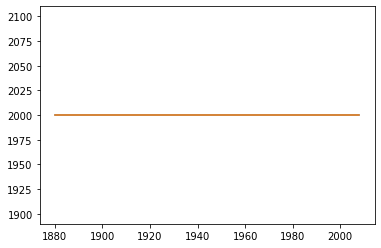

In [17]:
plt.plot(x,y1)
plt.plot(x,y2)

#### Task 2:

We have the min and max temperatures in a city In India for each months of the year. We
would like to find a function to describe this and show it graphically, the dataset given below.

    Task:
    1. fitting it to the periodic function
    2. plot the fit
    
    Data
    Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
    Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18


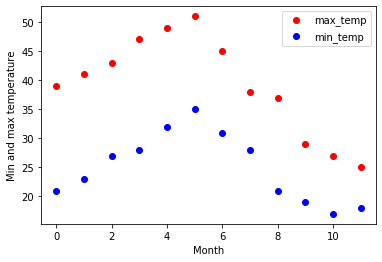

In [18]:
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

months = np.arange(12)
plt.plot(months, temp_max, 'ro', label = 'max_temp')
plt.plot(months, temp_min, 'bo', label = 'min_temp')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')
plt.legend()

In [19]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg+ ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months, temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, temp_min, [-40, 20, 0])

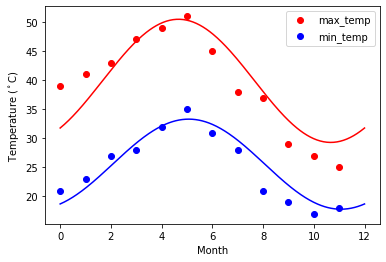

In [20]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro', label = 'max_temp')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo', label = 'min_temp')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.legend()
plt.show()